# Week 1 Programming Assignment 
Name: Haiyang Luo

Email: hml5369@psu.edu

Remark: 

(1) There are 9 problems, among which 7 problems are for 10 points whlie the other 2 problems are optional. Although the optional problems will not be counted, you are suggested to finish them as possible as you can.

(2) Please upload your solutions of this assignment to Canvas with a file named "Programming_Assignment_1 _yourname.ipynb" before 11:59pm May 23.

=================================================================================================================

### **Problem 1 (1 pt).** Plot the curve of function 
### $$f(x) = x^3 - x,~~ x \in[-1,1].$$

1.)


<function matplotlib.pyplot.legend(*args, **kwargs)>

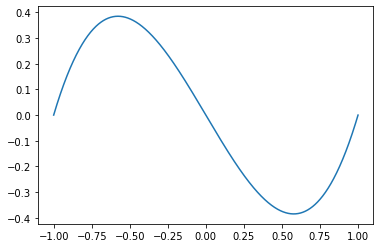

In [1]:
import torch
import matplotlib.pyplot as plt

def f(x):
    return x**3 -x
    
print("1.)")
x=torch.linspace(-1,1,1000)
plt.plot(x,f(x))
plt.legend


=================================================================================================================

### **Problem 2 (2 pts).** 
### (1) Find the two roots of the function
### $$f(x) = 2x^2 - x - 1,~~ x \in[-1,2].$$

### (2) Plot the curve of the function $f(x)$ defined in (1) and mark all the roots on the curve.

1.)
The two root of f are: [-0.5] [1.] 

2.)


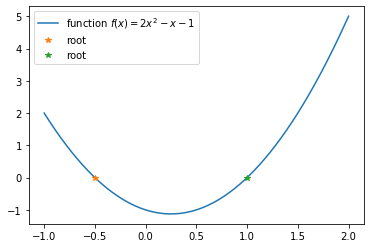

In [2]:
from scipy.optimize import fsolve
import numpy as np 
import matplotlib.pyplot as plt 

def f(x):
    return 2*x**2-x-1

x_0=fsolve(f,-1)
x_1=fsolve(f,2)
root = [x_0,x_1]
print("1.)")
print("The two root of f are:",x_0,x_1,"\n")
print("2.)")
x = np.linspace(-1,2,1000)
plt.plot(x,f(x),'-',label="function $f(x) = 2x^2-x-1$")
plt.plot(x_0,f(x_0),'*',label='root')
plt.plot(x_1,f(x_1),'*',label='root')
plt.legend()



=================================================================================================================

### **Problem 3 (optional)**.  Given $P=\begin{bmatrix} 1 & 2 \\ 3 & 4\end{bmatrix}$, investigate the two different multiplications $P*P$ and $torch.mm(P,P)$.

In [3]:
import torch
P = torch.tensor([[1,2],[3,4]],dtype=torch.float32)
print("P*P is ",P*P)
print("torch.mm(P,P) is ",torch.mm(P,P))

P*P is  tensor([[ 1.,  4.],
        [ 9., 16.]])
torch.mm(P,P) is  tensor([[ 7., 10.],
        [15., 22.]])


=================================================================================================================

### **Problem 4 (1 pt).**  Given 
### $$A=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}, ~~ b=\begin{bmatrix} 1  \\ 2 \\ 3\end{bmatrix}.$$
### Solve $A^2 x = b.$

In [4]:
import torch

A=torch.tensor([[1,2,3],[4,5,6],[7,8,9]],dtype=torch.float32)
B=torch.tensor([[1],[2],[3]],dtype=torch.float32)
A=torch.mm(A,A)
x=torch.solve(B,A)[0]
print("x is ",x)

x is  tensor([[-0.0010],
        [ 0.2241],
        [-0.1676]])


=================================================================================================================

### **Problem 5 (1 pt).**  Given $f(x,y) = x^2+y^2+(xy)^3$, compute $\frac{\partial f(x,y)}{\partial y}$ at $x=1,y=2$.

In [5]:
import torch

x = torch.tensor([1.0])
y = torch.tensor([2.0], requires_grad=True)

z = x**2 + y**2 +(x*y)**3
grad_z = torch.autograd.grad(outputs=z,inputs=y)
print("The value of $\\frac{\partial f(x,y)}{\partial y}$ is ",grad_z[0])

The value of $\frac{\partial f(x,y)}{\partial y}$ is  tensor([16.])


=================================================================================================================

### **Problem 6 (optional).** Define a function to find the minimum of three numbers $a,~b,~c$. Test your code and print the minimum of the three numbers, where $a=\sqrt{2},~ b=\frac{4}{3},~ c=0.5e$.

In [6]:
import math
def f(a,b,c):
    minv = a
    if b<minv:
        minv = b
    if c<minv:
        minv = c
    return minv

a = math.sqrt(2)
b = 4/3
c = 0.5*math.exp(1)
print("The minimum of a,b,c is: ",f(a,b,c))

The minimum of a,b,c is:  1.3333333333333333


=================================================================================================================


### **Problem 7 (1 pt).** Define a function to find the maximum and minimum of a sequence with n numbers.

Hint: x = np.random.randint(a,b,size=n) can randomly generate n numbers (saved in a row vector x ) and each number is between a and b.


In [7]:
import numpy as np

def f(nlist):
    return max(nlist),min(nlist)
x = np.random.randint(-100,100,size=10)
print("The list:",x)
maxv,minv = f(x)
print("The max value in the sequence is ",maxv,".\nThe min value in the sequence is ",minv,".")

The list: [ 89  81  23  -8 -41  10 -51  55  43 -52]
The max value in the sequence is  89 .
The min value in the sequence is  -52 .


=================================================================================================================

### **Problem 8 (1 pt).**  Define a function to sort a sequence with n numbers in ascending order.


In [8]:
def f(nlist):
    for i in range(len(nlist)-1):
        for j in range(len(nlist)-i-1):
            if nlist[j]>nlist[j+1]:
                nlist[j],nlist[j+1] = nlist[j+1],nlist[j]
    return nlist
x = np.random.randint(-100,100,size=10)
print("The list:",x)
print("The sorted list:",f(x))

The list: [-32  38 -73 -54  87   9  59  24  43  48]
The sorted list: [-73 -54 -32   9  24  38  43  48  59  87]


=================================================================================================================

### **Problem 9 (3 pts).**  Given a function 
### $$f(x,y)=(x-2)^2 + y^2 + 2(y-4)^2 + 2x^2 + 2xy + 4y -16x +1.$$
### Please write a code to apply gradient descent method to find the minimum of $f(x,y)$ with initial value $x=y=0$.


In [9]:
import torch
import math

def norm(x,y):
    return math.sqrt(x**2+y**2)
def f(x,y):
    return (x-2)**2+y**2+2*(y-4)**2+2*x**2+2*x*y+4*y-16*x+1
def subt(x,y):
    return x[0]-y[0],x[1]-y[1]
def mult_float_tensor(x,y):
    return x*y[0],x*y[1]
learn_rate=0.1
x_0=0.0
y_0=0.0
stepsize =(1.0,1.0)
while norm(stepsize[0],stepsize[1]) >0.0001:
    x = torch.tensor([x_0], requires_grad=True)
    y = torch.tensor([y_0], requires_grad=True)
    grad_z=torch.autograd.grad(outputs=f(x,y),inputs=[x,y])
    stepsize=mult_float_tensor(learn_rate,grad_z)
    x_0,y_0=subt((x,y),stepsize)
print("The minimum of f(x,y) is ",f(x_0,y_0)," where (x,y) = ",(x_0,y_0))

The minimum of f(x,y) is  tensor([1.], grad_fn=<AddBackward0>)  where (x,y) =  (tensor([2.9999], grad_fn=<SubBackward0>), tensor([1.0001], grad_fn=<SubBackward0>))
